In [1]:
import keras
from keras import models
from keras import layers
from keras import regularizers
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_losses(loss1, loss2, label1, label2):
    epochs = range(1, len(loss1) + 1)
    plt.plot(epochs, loss1, 'bo', label=label1)
    plt.plot(epochs, loss2, 'b', label=label2)
    plt.title('Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [3]:
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
def vectorize_sequences(sequences, max_index):
    sample_dim = len(sequences)
    zero_one_vectors = np.zeros((sample_dim, max_index))
    for i, sequence in enumerate(sequences):
        zero_one_vectors[i, sequence] = 1.0
    return zero_one_vectors

In [5]:
x_train = vectorize_sequences(train_data, num_words)
x_test = vectorize_sequences(test_data, num_words)
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [6]:
val_split = 5000 # 10000 in the book
x_val = x_train[:val_split]
partial_x_train = x_train[val_split:]

y_val = y_train[:val_split]
partial_y_train = y_train[val_split:]

Same model as in the original IMDB example. Other models are typically compared against this.

In [7]:
# Original model (DLwP 3.5)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

In [10]:
orig_model_loss = np.copy(history.history['val_loss'])

In [11]:
# Smaller model
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
40/40 [==============================] - 2s 33ms/step - loss: 0.6036 - accuracy: 0.6881 - val_loss: 0.5447 - val_accuracy: 0.7224
Epoch 2/20
40/40 [==============================] - 1s 29ms/step - loss: 0.5008 - accuracy: 0.8354 - val_loss: 0.4908 - val_accuracy: 0.7970
Epoch 3/20
40/40 [==============================] - 1s 30ms/step - loss: 0.4416 - accuracy: 0.8859 - val_loss: 0.4524 - val_accuracy: 0.8424
Epoch 4/20
40/40 [==============================] - 1s 29ms/step - loss: 0.3951 - accuracy: 0.9107 - val_loss: 0.4286 - val_accuracy: 0.8588
Epoch 5/20
40/40 [==============================] - 1s 28ms/step - loss: 0.3565 - accuracy: 0.9288 - val_loss: 0.4171 - val_accuracy: 0.8558
Epoch 6/20
40/40 [==============================] - 1s 29ms/step - loss: 0.3219 - accuracy: 0.9411 - val_loss: 0.3822 - val_accuracy: 0.8854
Epoch 7/20
40/40 [==============================] - 1s 28ms/step - loss: 0.2898 - accuracy: 0.9499 - val_loss: 0.3740 - val_accuracy: 0.8800
Epoch 8/20
40

In [13]:
small_model_loss = np.copy(history.history['val_loss'])

### Exercise

This notebook looks only into losses of various models. Compare their _accuracies_ on test set, too.
You could also give smoothening the curves a try. (exponential moving average)

You should see from the image that the base model overfits quite early (after 5 epochs) while the smaller model is much more resistant.

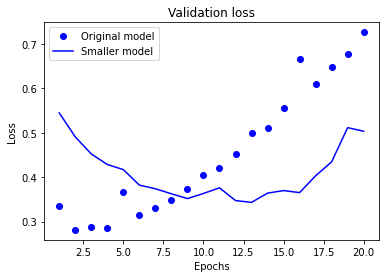

In [14]:
plot_losses(orig_model_loss, small_model_loss, 'Original model', 'Smaller model')

In [15]:
# larger model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

The bigger network gets its training loss near zero very quickly.

In [16]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
40/40 [==============================] - 11s 253ms/step - loss: 0.4891 - accuracy: 0.7819 - val_loss: 0.2887 - val_accuracy: 0.8850
Epoch 2/20
40/40 [==============================] - 10s 248ms/step - loss: 0.2385 - accuracy: 0.9056 - val_loss: 0.2629 - val_accuracy: 0.8912
Epoch 3/20
40/40 [==============================] - 10s 248ms/step - loss: 0.1389 - accuracy: 0.9478 - val_loss: 0.3005 - val_accuracy: 0.8942
Epoch 4/20
40/40 [==============================] - 10s 247ms/step - loss: 0.0651 - accuracy: 0.9775 - val_loss: 0.3485 - val_accuracy: 0.8782
Epoch 5/20
40/40 [==============================] - 10s 249ms/step - loss: 0.0887 - accuracy: 0.9822 - val_loss: 0.3606 - val_accuracy: 0.8848
Epoch 6/20
40/40 [==============================] - 10s 248ms/step - loss: 0.0054 - accuracy: 0.9996 - val_loss: 0.5526 - val_accuracy: 0.8906
Epoch 7/20
40/40 [==============================] - 10s 248ms/step - loss: 6.9582e-04 - accuracy: 0.9999 - val_loss: 0.6909 - val_accuracy: 0.

In [17]:
big_model_loss = np.copy(history.history['val_loss'])

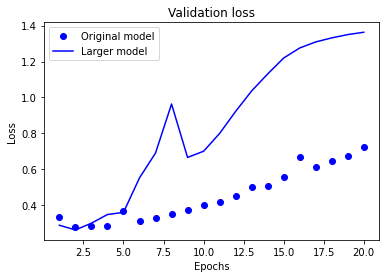

In [18]:
plot_losses(orig_model_loss, big_model_loss, 'Original model', 'Larger model')

### Regularization

In Keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.
Let’s add L2 weight regularization to the movie-review classification network.

l2(0.001) means every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value squared
to the total loss of the network.

#### Note
This penalty is only added at training time. Hence the loss (for this network) will be much higher at training than at test time.

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
40/40 [==============================] - 2s 37ms/step - loss: 0.5189 - accuracy: 0.8098 - val_loss: 0.4137 - val_accuracy: 0.8584
Epoch 2/20
40/40 [==============================] - 1s 31ms/step - loss: 0.3358 - accuracy: 0.9023 - val_loss: 0.3602 - val_accuracy: 0.8758
Epoch 3/20
40/40 [==============================] - 1s 31ms/step - loss: 0.2812 - accuracy: 0.9196 - val_loss: 0.3224 - val_accuracy: 0.8932
Epoch 4/20
40/40 [==============================] - 1s 30ms/step - loss: 0.2549 - accuracy: 0.9295 - val_loss: 0.3319 - val_accuracy: 0.8872
Epoch 5/20
40/40 [==============================] - 1s 31ms/step - loss: 0.2368 - accuracy: 0.9360 - val_loss: 0.3381 - val_accuracy: 0.8874
Epoch 6/20
40/40 [==============================] - 1s 31ms/step - loss: 0.2265 - accuracy: 0.9417 - val_loss: 0.3772 - val_accuracy: 0.8694
Epoch 7/20
40/40 [==============================] - 1s 31ms/step - loss: 0.2200 - accuracy: 0.9430 - val_loss: 0.3482 - val_accuracy: 0.8888
Epoch 8/20
40

In [21]:
regularized_model_loss = np.copy(history.history['val_loss'])

The model with L2 regularization is much more resistant to overfitting
than the reference model, even though both models have the same number of parameters.

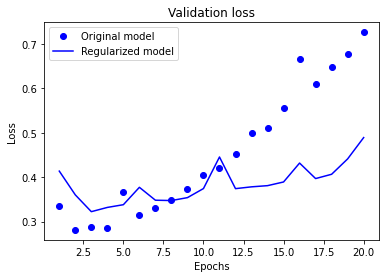

In [22]:
plot_losses(orig_model_loss, regularized_model_loss, 'Original model', 'Regularized model')

In [23]:
# Other regularizers (just for show)
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

### Dropout

Below is sort of a "dropout" in Numpy --- just to illustrate the idea how to implement it.

In [ ]:
# some toy data
layer_output = np.random.randn(512)

# At training time, drops out 50% of the units in the output
layer_output *= np.random.randint(0, high=2, size=512) # size=layer_output.shape

# At test time, we scale down the output by the dropout rate.
# Here, we scale by 0.5 (because we previously dropped half the units):
layer_output *= 0.5 # at test time

# ==============================

# Note that this process can be implemented by doing both operations at training time and
# leaving the output unchanged at test time,
# which is often the way it’s implemented in practice (see figure 4.8):

# Note that we’re scaling up rather than scaling down in this case (since 0.5 < 1)
layer_output *= np.random.randint(0, high=2, size=layer_output.shape) # At training time
layer_output /= 0.5
# At test time, the activation matrix is unchanged. (if you upscale when training)

# ===============================

# Other percentages p than 50% could be implemented as follows
# - do the following for each mask element m[i]
# - draw a random number r from uniform [0,1] -distribution
# - if r <= p, set m[i] to 1, otherwise to 0 (here p being the probability of value 1)

In Keras, you can introduce dropout in a network via the `Dropout` layer,
which is applied to the output of the layer right _before_ it: `model.add(layers.Dropout(0.5))`

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 119us/step - loss: 0.6141 - acc: 0.6562 - val_loss: 0.4535 - val_acc: 0.8520
Epoch 2/20
20000/20000 [==============================] - 2s 99us/step - loss: 0.4572 - acc: 0.8039 - val_loss: 0.3426 - val_acc: 0.8738
Epoch 3/20
20000/20000 [==============================] - 2s 99us/step - loss: 0.3616 - acc: 0.8567 - val_loss: 0.2928 - val_acc: 0.8830
Epoch 4/20
20000/20000 [==============================] - 2s 100us/step - loss: 0.3027 - acc: 0.8921 - val_loss: 0.2934 - val_acc: 0.8806
Epoch 5/20
20000/20000 [==============================] - 2s 100us/step - loss: 0.2562 - acc: 0.9091 - val_loss: 0.2958 - val_acc: 0.8822
Epoch 6/20
20000/20000 [==============================] - 2s 100us/step - loss: 0.2227 - acc: 0.9236 - val_loss: 0.2986 - val_acc: 0.8822
Epoch 7/20
20000/20000 [==============================] - 2s 100us/step - loss: 0.2006 - acc: 0.9325 - val_loss: 0.2946 - val

In [ ]:
dropout_model_loss = np.copy(history.history['val_loss'])

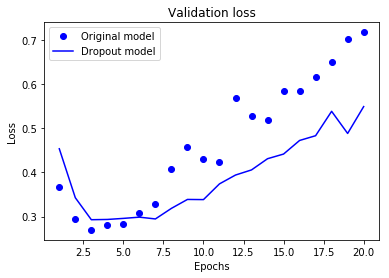

In [ ]:
plot_losses(orig_model_loss, dropout_model_loss, 'Original model', 'Dropout model')

Finally, let's use both L2 regularization and dropout.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 118us/step - loss: 0.6418 - acc: 0.6683 - val_loss: 0.5311 - val_acc: 0.8224
Epoch 2/20
20000/20000 [==============================] - 2s 100us/step - loss: 0.5034 - acc: 0.7977 - val_loss: 0.4020 - val_acc: 0.8798
Epoch 3/20
20000/20000 [==============================] - 2s 100us/step - loss: 0.4337 - acc: 0.8477 - val_loss: 0.3541 - val_acc: 0.8882
Epoch 4/20
20000/20000 [==============================] - 2s 100us/step - loss: 0.3812 - acc: 0.8793 - val_loss: 0.3282 - val_acc: 0.8850
Epoch 5/20
20000/20000 [==============================] - 2s 100us/step - loss: 0.3439 - acc: 0.8952 - val_loss: 0.3312 - val_acc: 0.8900
Epoch 6/20
20000/20000 [==============================] - 2s 100us/step - loss: 0.3206 - acc: 0.9084 - val_loss: 0.3269 - val_acc: 0.8842
Epoch 7/20
20000/20000 [==============================] - 2s 101us/step - loss: 0.2993 - acc: 0.9157 - val_loss: 0.3249 - v

In [ ]:
drop_reg_model_loss = np.copy(history.history['val_loss'])

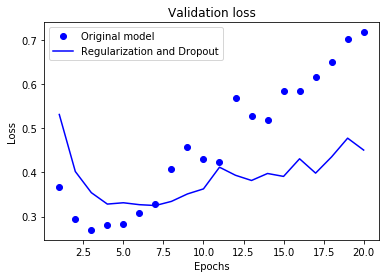

In [ ]:
plot_losses(orig_model_loss, drop_reg_model_loss, 'Original model', 'Regularization and Dropout')

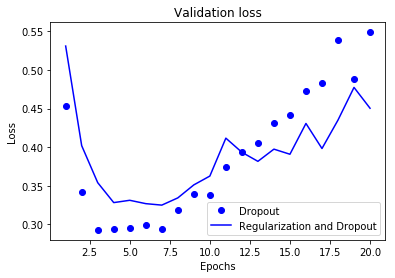

In [ ]:
plot_losses(dropout_model_loss, drop_reg_model_loss, 'Dropout', 'Regularization and Dropout')

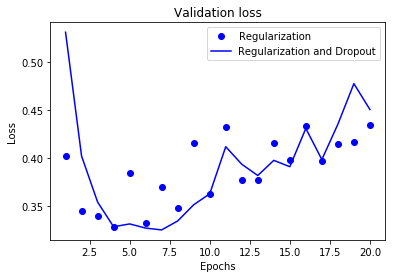

In [ ]:
plot_losses(regularized_model_loss, drop_reg_model_loss, 'Regularization', 'Regularization and Dropout')